This blog post is really helpful for the Python specific implementation of this package:

http://www.ericbunch.org/blog/breakout-detection-by-twitter/

---

This paper is referenced in the R documentation:

[Nicholas A. James, Arun Kejariwal, David S. Matteson, "Leveraging Cloud Data to Mitigate User Experience from 'Breaking Bad': The Twitter Approach, 2014](http://arxiv.org/abs/1411.7955)


In [141]:
import math
import random
import datetime
import pandas.io.data as web 
import breakout_detection as bd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
#start = datetime.datetime(2015, 1, 1)
#end = datetime.datetime(2015, 1, 31)
#snp = web.DataReader("F", 'yahoo', start, end)
#snp = web.DataReader('^GSPC', 'yahoo')  # <-- This hangs indefinitely
# max_snp = max(max(snp['Open']),1) 
# Z = [x/float(max_snp) for x in snp['Open']] 

In [202]:
def plot_results(data=None, detected_thresholds=None):
    plt.figure(figsize=(9,3))
    plt.plot(data, label='Data')
    for i, loc in enumerate(edm_multi.getLoc()):
        if i == 0:
            plt.axvline(loc, color='black', lw=4, alpha=0.5, label="Alleged Threshold")
        else:
            plt.axvline(loc, color='black', lw=4, alpha=0.5)
    plt.legend()

In [199]:
edm_multi = bd.EdmMulti() 

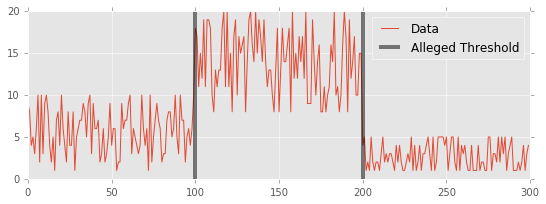

In [209]:
## Let's fake some softball data
Z_easy = np.array([random.randint(1,10) for x in xrange(100)]
            + [random.randint(8,20) for x in xrange(100)]
            + [random.randint(1,5) for x in xrange(100)])


edm_multi.evaluate(Z_easy, min_size=64, beta=0.0001, degree=1) 
plot_results(data=Z_easy, detected_thresholds=edm_multi.getLoc())

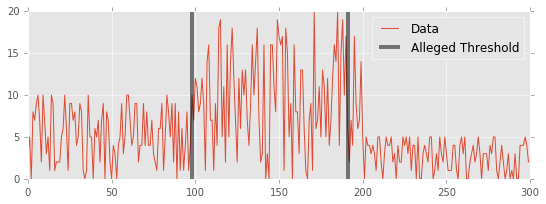

In [210]:
## Some slightly less softball data. But still pretty easy.
Z_less_easy = np.array([random.randint(0,10) for x in xrange(100)]
            + [random.randint(0,20) for x in xrange(100)]
            + [random.randint(0,5) for x in xrange(100)])


edm_multi.evaluate(Z_less_easy, min_size=64, beta=0.0001, degree=1) 
plot_results(data=Z_less_easy, detected_thresholds=edm_multi.getLoc())

In [212]:
# Okay, what about discontinuous linearly increasing trends?
Z_linear_increase = np.array(xrange(2500)) 
jumps = np.array([0]*750 + [1000]*750 + [0]*1000)
noise = np.array([random.randint(-1,1) * (x**0.5) for x in xrange(len(Z_linear_increase))]) 
Z_linear_increase = Z_linear_increase + jumps + noise

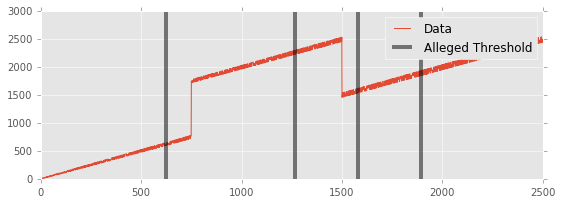

In [213]:
edm_multi.evaluate(Z_linear_increase, min_size=len(Z_linear_increase)/8, beta=0.001, degree=1) 
plot_results(data=Z_linear_increase, detected_thresholds=edm_multi.getLoc())

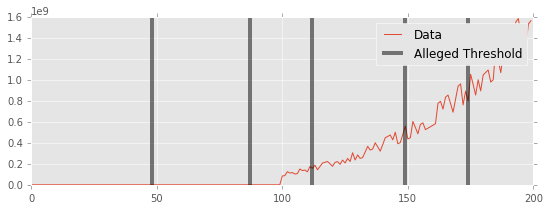

In [214]:
## What about a change in an exponential rate of increase?
Z1_exp = np.array(xrange(0,100))**2
Z2_exp = np.array(xrange(100,200))**4
Z_exp = np.hstack((Z1_exp, Z2_exp))

noise1_exp = np.array([float(random.randint(-1,1)) * (x**0.9) for x in Z1_exp])
noise2_exp = np.array([float(random.randint(-1,1)) * (x**0.9) for x in Z2_exp])
noise_exp = np.hstack((noise1_exp, noise2_exp))

Z_exp = Z_exp + noise_exp

edm_multi.evaluate(Z_exp, min_size=len(Z_exp)/8, beta=0.001, degree=1)
plot_results(data=Z_exp, detected_thresholds=edm_multi.getLoc())

It looks like this algorithm only works on data w/ zero slope.

A possible way around this is:
1. Check if the data has zero slope.
2. If not, transform the data such that it does have zero slope, then...
3. Run EDM on the transformed data.

**Questions**:
1. Is there a scikit-learn, scipy, etc. package for calculating approximate derivatives?
    + **Answer:** [np.diff](http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.diff.html)
2. How to chain the steps above into an automated routine using scikit-learn pipelines?

-0.0167224080268


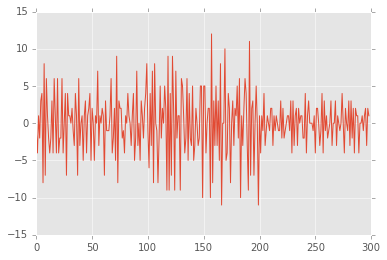

In [235]:
## Function to check the first derivative of the input data
print (np.diff(Z_easy).mean())
plt.plot(np.diff(Z_easy))

-0.00334448160535


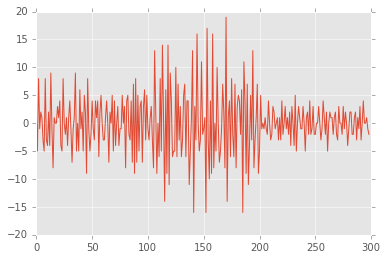

In [234]:
print (np.diff(Z_less_easy).mean())
plt.plot(np.diff(Z_less_easy))

1.0


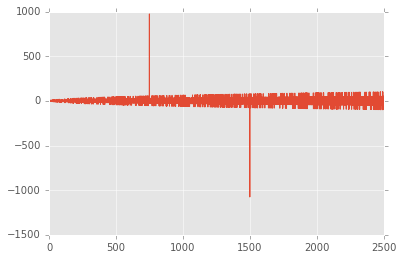

In [233]:
print (np.diff(Z_linear_increase).mean() )
plt.plot(np.diff(Z_linear_increase))

158008.0


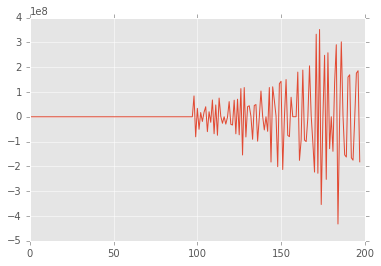

In [238]:
print (np.diff(Z_exp, n=2).mean())
plt.plot(np.diff(Z_exp, n=2))